## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [66]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [67]:
#reading and storing the csv file in a dataframe

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [68]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [69]:
#how many unique user used the page
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [70]:
#calculating how many users were converted out 
#of all the users who used the pages
df[df['converted'] == 1].count()[1]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [71]:
#creating two dataframes for each possibility to count the times 
#the two values are not lining up
newpage = df.query('landing_page == "new_page" and group != "treatment"').count()[1]
treat = df.query('landing_page != "new_page" and group == "treatment"').count()[1]
newpage + treat

3893

f. Do any of the rows have missing values?

In [72]:
#Checking the dataframe for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [73]:
#I will be creating two new dataframes to include only the rows 
#where treatment is aligned with new_page and control is aligned with old_page
#then i will append one to the other to have one final dataframe with only 
#the row i'm confident they are accurate
df1 = df.query('landing_page == "new_page" and group == "treatment"')
df2 = df.query('landing_page == "old_page" and group == "control"')
df2 = df2.append(df1)

In [74]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [75]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [76]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [77]:
#locating the duplicated user id  
df2.loc[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [78]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [79]:
df2 = df2.drop_duplicates(subset = ['user_id'], keep='first')
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [80]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [81]:
df2[df2['converted'] == 1].count()[1]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [82]:
#Creating a new dataframe only for the control group
df2_control = df2.query('group == "control"')

In [83]:
df2_control.query('converted == 1')['user_id'].count()/df2_control['user_id'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [84]:
#Creating a new dataframe only for the treatment group
df2_treatment = df2.query('group == "treatment"')

In [85]:
df2_treatment.query('converted == 1')['user_id'].count()/df2_treatment['user_id'].count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [86]:
df2[df2['landing_page'] == "new_page"].count()[1]/df2.shape[0]

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

>> 
#### Suggestions:

>>Both pages have equal probability of being the landing page: **50%**

>>From the success conversion rate numbers:
>>- The general success conversion rate is **11.9%**
>>- The success conversion rate if the landing page was the old page is **12%**
>>- The success conversion rate if the landing page was the old page is **11.8%**

>>This doesn't help much, yes it rules in favor of the old page, but with a very small difference. Further analysis and tests need to be applied to confirm the results


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>>-- The null hypothesis will be that the new page is the same or worse than the old one. 

>>-- The alternative hypothesis will be that the new page is better than the old one.

>>**Null Hypothesis** = **$p_{new}$** - **$p_{old}$** =< 0

>>**Alternative Hypothesis** = **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [87]:
#It's the same as the success conversion rate regardless of the page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [88]:
#It's the same as the success conversion rate regardless of the page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [89]:
#we are using a sample size equal to the one of new_page in df2

n_new = df2[df2['landing_page']=="new_page"].count()[0]
n_new

145310

d. What is $n_{old}$?

In [90]:
#we are using a sample size equal to the one of old_page in df2
n_old = df2[df2['landing_page']=="old_page"].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [91]:
new_page_converted = np.random.binomial(1, size = n_new, p=p_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [92]:
old_page_converted = np.random.binomial(1, size = n_old, p= p_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [93]:
#finding the difference in mean between the two pages conversion rate
new_page_converted.mean() - old_page_converted.mean()

0.00061703349312615396

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [94]:
p_diffs = []
for _ in range(10000):
    old_converted = np.random.binomial(1, size = n_old, p= p_old)
    new_converted = np.random.binomial(1, size = n_new, p=p_new)
    p_diffs.append(new_converted.mean() - old_converted.mean())

In [ ]:
old_converted = np.random.binomial(n_old, p_old, )

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   24.,   163.,   706.,  1655.,  2651.,  2589.,  1537.,   542.,
          116.,    17.]),
 array([ -4.22810677e-03,  -3.36571806e-03,  -2.50332934e-03,
         -1.64094063e-03,  -7.78551919e-04,   8.38367933e-05,
          9.46225505e-04,   1.80861422e-03,   2.67100293e-03,
          3.53339164e-03,   4.39578035e-03]),
 <a list of 10 Patch objects>)

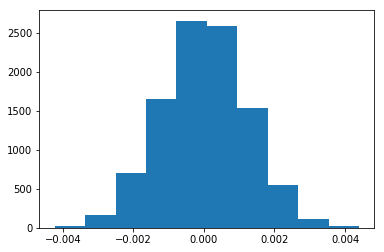

In [95]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [96]:
# calculating the actual success conversion rate for old page
actual_old = df2.query('converted == 1 and landing_page=="old_page"').count()[0]/n_old

In [97]:
# calculating the actual success conversion rate for new page
actual_new = df2.query('converted == 1 and landing_page=="new_page"').count()[0]/n_new

In [98]:
actual_old, actual_new

(0.1203863045004612, 0.11880806551510564)

In [99]:
# the observed difference in success conversion rate between the two pages 
obs_diffs = actual_new - actual_old
obs_diffs

-0.0015782389853555567

In [100]:
p_diffs = np.array(p_diffs)
null_value = np.random.normal(0, p_diffs.std(), p_diffs.size)

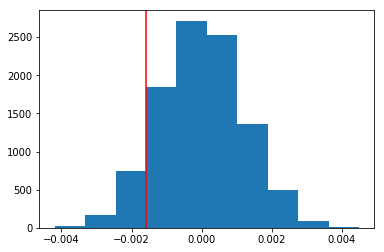

In [101]:
#showing where obs_diffs is from the p_diffs
plt.hist(null_value)
plt.axvline(obs_diffs, c="r")

In [102]:
#proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_value > obs_diffs).mean()

0.90310000000000001

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>> - we simulated a sampling distribution from the null hypothesis
>> - we then compared the difference of the mean success in conversion rate for the old page and new page for our sampling distribution with the our actual observed analysis for the conversion rate for the old page and new page
- We came up with the p-value (0.82) which is higher than the significance level of 0.05
>>
#### Conclusion: 
>>- We fail to reject the null hypotheses

>> This supports our previous results that the old page has the same or a higher rate of conversion than the new page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [103]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page=="old_page"').count()[0]
convert_new = df2.query('converted == 1 and landing_page=="new_page"').count()[0]
n_old = df2[df2['landing_page']=="old_page"].count()[0]
n_new = df2[df2['landing_page']=="new_page"].count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [104]:
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
z_score, p_value = sm.stats.proportions_ztest(count,nobs, alternative='larger')

z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [105]:
# we need the critical value for our z-score at a 95% confidence
# we use scipy stats.norm for that

from scipy.stats import norm
norm.ppf(0.95)


1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>>- The z_score 1.31 is less than the critical value of 1.65
>>- The p_value 0.09 exceeds the significance level 0.05

>> #### Conclusion:
>>- We fail to reject the null hypothesis

>>This again supports our previous findings that implementing the new page will not be resulting on a higher conversion rate, so it's not better than the old one.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>> Since the predicted value will be a categorical variable, we will be using **Logistic Regression** in this case

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [106]:
#adding the intercept column
# adding a new dummy variable column for the group

df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [107]:
#Creating and fitting the regression model 

log_m = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_m.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [108]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        17:35:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [109]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>> The p-value is 0.190, it's different from before because both hypothesis are different

>> ##### Part II :
>>- Null Hypothesis: the new page is the same or worse than the old one. 
>>- Alternative Hypothesis: the new page is better than the old one.

>> ##### Part III:

>>- Null Hypothesis: the new page is the same as old one. 
>>- Alternative Hypothesis: the new page is different than the old one.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>> Our regression predicts the conversion solely based on the landing page or the group included, including other factors that might affect the conversion can change our results and lead to different decisions.

>> For example we can categorize our timestamp column as weekdays and weekends and create dummy variable (and dropping one eventually) 


>> The disadvantage of including other factor can arise if the factors in our regression are dependent on each other, then we will need to add "Higher Order Terms" this will make the results of the data more complex and no longer easily interpreted as before.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [110]:
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [111]:
# using merge to join tables on user_id
df_new = df2.merge(df3, on='user_id', how='left')
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US


In [112]:
df_new['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [113]:
df_new[['US', 'CA', 'UK']] = pd.get_dummies(df_new['country'])

new_log_m = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA']])

new_results = new_log_m.fit()

new_results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        17:35:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
CA             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [114]:
1/np.exp(-0.0149), 1/np.exp(-0.0408), np.exp(0.0099)

(1.0150115583846535, 1.0416437559600236, 1.0099491671175422)


>>- CA is **1.01** more likely to convert than UK, holding all other variables constant
>>- US is **1.04** less likely to convert than UK, holding all other variables constant
>>- A user using the old page (control group) is **1.02** more likely to convert than a user using the new page (treatment group)

>>- p-values suggest that country variables are not statistically significant in predicting if a user will convert or not.
>>- p-value suggest that using the new page (treatment group) is not statistically significant in predicting if a user will convert or not



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [115]:
#creating an intercation between country and page

df_new['US_ab_page'] = df_new['US']*df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']

In [116]:
#creating and fitting my regression model

new_log_m2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US_ab_page', 'CA_ab_page', 'US', 'CA']])

new_results2 = new_log_m2.fit()

new_results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:               3.482e-05
Time:                        17:35:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
CA_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
CA            -0.0057      0.019     -0.306      0.760      -0.043       0.031
==============================================================================
"""

In [117]:
ab_page = 1/np.exp(-0.0206)
US_ab_page = 1/np.exp(-0.0469)
CA_ab_page = np.exp(0.0314)
US = 1/np.exp(-0.0175)
CA = 1/np.exp(-0.0057)

ab_page, US_ab_page, CA_ab_page, US, CA

(1.0208136445037459,
 1.0480172021191829,
 1.0318981806179213,
 1.0176540221507617,
 1.0057162759095335)

>> ##### Individual Factors:
>>- CA is **1.01** more likely to convert than UK, holding all other variables constant
>>- US is **1.02** less likely to convert than UK, holding all other variables constant
>>- A user using the old page (control group) is **1.02** more likely to convert than a user using the new page (treatment group)

>> ##### New Columns:

>>- A user of the new page in CA is **1.03** more likely to convert than a user of the new page in the UK, holding all other variables constant
>>- A user of the new page in the US is **1.05** less likely to convert than a user of the new page in the UK, holding all other variables constant

>> ##### P-Value
>>- p-values suggest that country variables are not statistically significant in predicting if a user will convert or not.
>>- p-value suggest that using the new page (treatment group) is not statistically significant in predicting if a user will convert or not

>>- p-values suggest that that using the new page in a certain country is not statistically significant in predicting if a user will convert or not.


### Final observation: 
Based on the analysis done, there is not enough statistical evidence to reject the Null Hypothesis

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.